In [0]:
import pandas as pd
import numpy as np

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score

import eli5
from eli5.sklearn import PermutationImportance

In [16]:
# wczytywanie danych
cd  "/content/drive/My Drive/Colab Notebooks/matrix_two/dw_matrix_car"

/content/drive/My Drive/Colab Notebooks/matrix_two/dw_matrix_car


In [17]:
ls

data/  README.md


In [18]:
df=pd.read_hdf('data/car.h5')
df.shape

(106494, 155)

In [19]:
df.columns

Index(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       ...
       'param_pearl', 'param_stan', 'param_wersja', 'param_emisja-co2',
       'param_body-type', 'param_matowy', 'param_bezwypadkowy',
       'param_akryl-(niemetalizowany)', 'param_monthly-payment-value',
       'car_id'],
      dtype='object', length=155)

In [21]:
# Dummy model
df.select_dtypes(np.number).columns

Index(['price_value', 'car_id'], dtype='object')

In [25]:
feats =['car_id']
X=df[feats].values
y=df['price_value'].values

model=DummyRegressor()
model.fit(X,y)
y_pred = model.predict(X)

mae(y, y_pred)

39465.934630440985

In [26]:
[x for x in df.columns if 'price' in x]

['price_currency', 'price_details', 'price_value']

In [27]:
df['price_currency'].value_counts()

PLN    106290
EUR       204
Name: price_currency, dtype: int64

In [29]:
#df['price_currency'].value_counts(normalize=True)* 100

PLN    99.80844
EUR     0.19156
Name: price_currency, dtype: float64

In [30]:
df=df[df['price_currency'] != 'EUR']
df.shape

(106290, 155)

In [0]:
##features

In [32]:
df['param_color'].factorize()[0]

array([-1, -1, -1, ..., -1, -1, -1])

In [33]:
for feat in df.columns:
    print(feat)

breadcrumb
created_at
price_currency
price_details
price_value
seller_address
seller_name
seller_type
feature_czujniki-parkowania-przednie
feature_poduszka-powietrzna-chroniąca-kolana
feature_kurtyny-powietrzne
feature_klimatyzacja-dwustrefowa
feature_światła-led
feature_czujnik-zmierzchu
feature_elektrycznie-ustawiane-lusterka
feature_asr-(kontrola-trakcji)
feature_poduszka-powietrzna-kierowcy
feature_cd
feature_elektryczne-szyby-przednie
feature_poduszka-powietrzna-pasażera
feature_system-start-stop
feature_światła-do-jazdy-dziennej
feature_komputer-pokładowy
feature_elektryczne-szyby-tylne
feature_klimatyzacja-manualna
feature_tapicerka-welurowa
feature_czujnik-deszczu
feature_światła-przeciwmgielne
feature_ogrzewanie-postojowe
feature_radio-niefabryczne
feature_regulowane-zawieszenie
feature_ogranicznik-prędkości
feature_zmieniarka-cd
feature_szyberdach
feature_isofix
feature_asystent-pasa-ruchu
feature_alufelgi
feature_bluetooth
feature_nawigacja-gps
feature_asystent-parkowania
fe

In [36]:
SUFFIX_CAT ='_cat'
for feat in df.columns:
   if isinstance(df[feat][0], list):continue

   factorized_values = df[feat].factorize()[0]
   if SUFFIX_CAT in feat:
     df[feat]=factorized_values
   else:
     df[feat+SUFFIX_CAT]=factorized_values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [40]:
cat_feats = [x for x in df.columns if SUFFIX_CAT in x]
cat_feats=[x for x in cat_feats if 'price' not in x]
len(cat_feats)

151

In [45]:
X=df[cat_feats].values
y=df['price_value'].values

model=DecisionTreeRegressor(max_depth=5)
scores= cross_val_score(model,X,y,cv=3,scoring='neg_mean_absolute_error')
np.mean(scores)


-19650.45289201444

In [0]:
def group_and_barplot(feat_groupby, feat_agg ='price_value', agg_funcs=[np.mean, np.median, np.size], feat_sort='mean', top=50, subplots=True):
 return (
    df
      .groupby(feat_groupby)[feat_agg]
      .agg(agg_funcs)
      .sort_values(by=feat_sort,ascending=False)
      .head(top)

).plot(kind='bar',figsize=(15,5), subplots=subplots)

In [46]:
m= DecisionTreeRegressor(max_depth=5)
m.fit(X,y)

imp = PermutationImportance(m,random_state=0).fit(X,y)
eli5.show_weights(imp,feature_names=cat_feats)

Weight,Feature
0.1956 ± 0.0054,param_faktura-vat_cat
0.1903 ± 0.0027,param_napęd_cat
0.1815 ± 0.0087,param_stan_cat
0.1512 ± 0.0078,param_rok-produkcji_cat
0.0928 ± 0.0019,param_skrzynia-biegów_cat
0.0607 ± 0.0051,param_moc_cat
0.0436 ± 0.0015,feature_kamera-cofania_cat
0.0191 ± 0.0022,param_pojemność-skokowa_cat
0.0162 ± 0.0004,feature_bluetooth_cat
0.0110 ± 0.0007,feature_łopatki-zmiany-biegów_cat


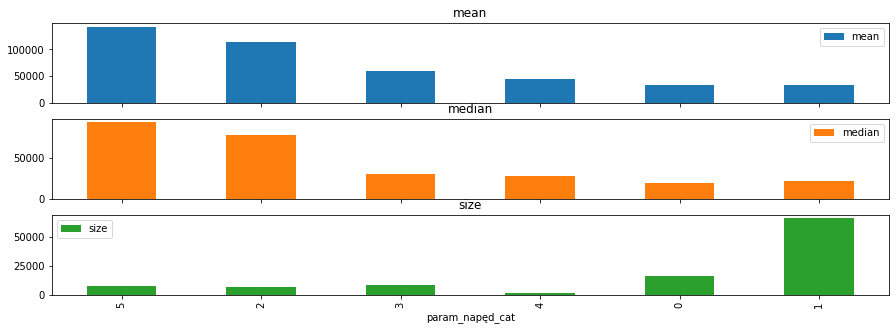

In [51]:
group_and_barplot('param_napęd_cat');

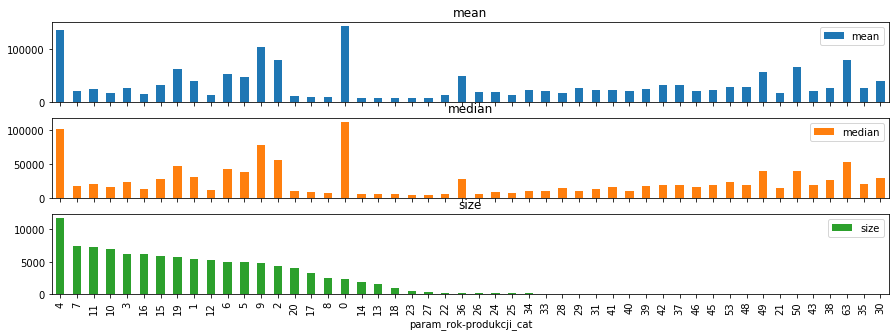

In [55]:
group_and_barplot('param_rok-produkcji_cat',feat_sort='size');

1.15.0


In [2]:
!pip install --upgrade tables
!pip install eli5

     |████████████████████████████████| 4.3MB 2.8MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4
     |████████████████████████████████| 112kB 2.8MB/s 
